In [1]:
install.packages("dplyr")
install.packages("caret")
install.packages("e1071")
install.packages("magrittr")
install.packages("pacman")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
train<-readRDS("/content/spambase_trn.rds")
test<-readRDS("/content/spambase_tst.rds")

In [3]:
head(train,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.185,0.743,0,0.000,0.000,0.000,4.476,14,94,NotSpam
2,0.00,0.1,0.31,0.1,1.05,0.42,0.00,0.31,0,0.1,⋯,0.000,0.054,0,0.384,0.182,0.201,8.851,299,1726,Spam
3,0.00,0.0,0.00,0.0,0.00,1.21,0.00,0.00,0,0.0,⋯,0.000,0.212,0,0.000,0.000,0.000,1.406,5,45,NotSpam
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.000,0.000,0,0.000,0.000,0.000,1.600,3,8,NotSpam
5,0.47,0.0,0.94,0.0,0.94,0.00,0.94,0.00,0,0.0,⋯,0.000,0.073,0,1.254,0.221,0.000,5.918,91,219,Spam


In [4]:
head(test,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,Spam
2,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,Spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,Spam
4,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,⋯,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,Spam
5,0.05,0.07,0.10,0,0.76,0.05,0.15,0.02,0.55,0.00,⋯,0.042,0.101,0.016,0.250,0.046,0.059,2.569,66,2259,Spam


In [5]:
library(caret)


Loading required package: ggplot2

Loading required package: lattice



In [6]:
control_param<-trainControl(method="repeatedcv",number=5,repeats=3)

In [18]:
install.packages("klaR")
install.packages("naivebayes")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(klaR)
install.packages("klaR")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
gridparam <- expand.grid(
  laplace = c(0, 0.005, 0.1, 0.5, 0.8, 1.0),
  usekernel = c(FALSE, TRUE),
  adjust = c(0.1, 0.5))


nb<-train(y~.,data=train,method="naive_bayes",trControl=control_param,tuneGrid=gridparam,
          na.action="na.omit")


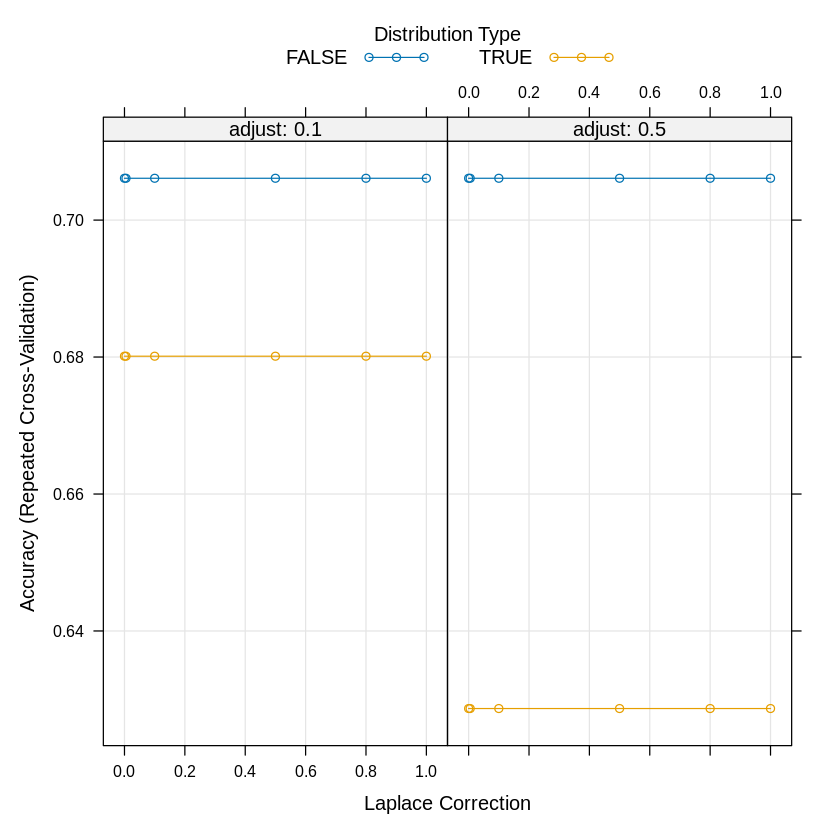

In [24]:
# Plot parameter values against accuracy
nb %>% plot()

In [25]:
# Print the final model
nb %>% print()

Naive Bayes 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  Accuracy   Kappa   
  0.000    FALSE      0.1     0.7061077  0.447995
  0.000    FALSE      0.5     0.7061077  0.447995
  0.000     TRUE      0.1     0.6801242  0.407538
  0.000     TRUE      0.5     0.6286749  0.330972
  0.005    FALSE      0.1     0.7061077  0.447995
  0.005    FALSE      0.5     0.7061077  0.447995
  0.005     TRUE      0.1     0.6801242  0.407538
  0.005     TRUE      0.5     0.6286749  0.330972
  0.100    FALSE      0.1     0.7061077  0.447995
  0.100    FALSE      0.5     0.7061077  0.447995
  0.100     TRUE      0.1     0.6801242  0.407538
  0.100     TRUE      0.5     0.6286749  0.330972
  0.500    FALSE      0.1     0.7061077  0.447995
  0.500    FALSE      0.5     0.706107

In [26]:
# Predict test set with best model
pred <- predict(  # Create new variable ("predicted")
  nb,             # Apply saved model
  newdata = test   # Use test data
)


In [28]:
# Get the confusion matrix
cm <- pred %>%confusionMatrix(reference = test$y)


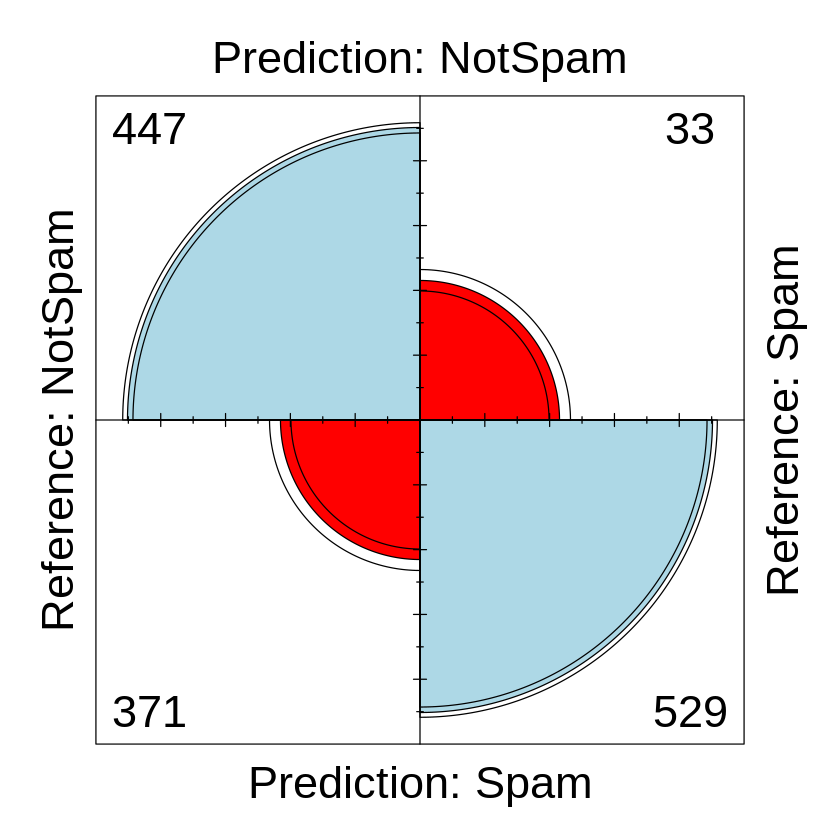

In [29]:
# Plot the confusion matrix
cm$table %>% fourfoldplot(color = c("red", "lightblue"))

In [30]:

# Print the confusion matrix
cm %>% print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     447   33
   Spam        371  529
                                          
               Accuracy : 0.7072          
                 95% CI : (0.6825, 0.7312)
    No Information Rate : 0.5928          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4458          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5465          
            Specificity : 0.9413          
         Pos Pred Value : 0.9313          
         Neg Pred Value : 0.5878          
             Prevalence : 0.5928          
         Detection Rate : 0.3239          
   Detection Prevalence : 0.3478          
      Balanced Accuracy : 0.7439          
                                          
       'Positive' Class : NotSpam         
               